In [107]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
#import matplotlib.colors as colors
plt.style.use('seaborn-colorblind')


In [108]:
#print(plt.style.available)

In [109]:
accepted = pd.read_csv("C:\\Users\\nilli\\Downloads\\accepted_b_2015_clean.csv")

# accepted = pd.read_csv("C:\\Users\\nilli\\Downloads\\lending-club\\accepted_before_2015.csv")
# "C:\Users\nilli\Downloads\lending-club\accepted_before_2015.csv"

In [110]:
accepted.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,duration_days,invest_return,invest_return_per,duration_months
0,36805548,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,A3,Truck Driver Delivery Personel,...,15030.0,13000.0,11325.0,N,Cash,N,609,-3788.31,-0.364261,20
1,38098114,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,C1,MANAGEMENT,...,149140.0,10000.0,12000.0,N,Cash,N,548,2392.37,0.159491,18
2,37822187,9600.0,9600.0,9600.0,36 months,13.66,326.53,C,C3,Admin Specialist,...,38566.0,21100.0,24890.0,N,Cash,N,121,373.43,0.038899,4
3,37662224,7650.0,7650.0,7650.0,36 months,13.66,260.20,C,C3,Technical Specialist,...,64426.0,4900.0,64031.0,N,Cash,N,243,-5368.02,-0.701702,8
4,37842129,21425.0,21425.0,21425.0,60 months,15.59,516.36,D,D1,Programming Analysis Supervisor,...,42315.0,15000.0,35573.0,N,Cash,N,517,4087.20,0.190768,17


In [111]:
accepted.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       

In [112]:
accepted['grade'].value_counts()

B    134872
C    121221
A     74573
D     73224
E     33881
F     12724
G      3152
Name: grade, dtype: int64

In [113]:
accepted['term'].value_counts()

 36 months    337581
 60 months    116066
Name: term, dtype: int64

In [114]:
accepted[['grade','term']].groupby('grade').count()

,term
grade,
A,74573
B,134872
C,121221
D,73224
E,33881
F,12724
G,3152


In [115]:
accepted['loan_amnt'].agg(['max', 'min']) # range of loan amount borrowed

max    35000.0
min      500.0
Name: loan_amnt, dtype: float64

In [116]:
accepted.select_dtypes(include ='object').columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type', 'hardship_flag',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')

In [117]:
# accepted.select_dtypes()

In [118]:
#accepted['acceptD']
# date_cols = [col for col in accepted.columns if 'accept' in col]
# print(date_cols)

In [119]:
accepted['loan_status'].value_counts()

FullyPaid    376150
Defaulted     77497
Name: loan_status, dtype: int64

In [120]:
accepted.groupby(['grade','term']).size()

grade  term      
A       36 months     72823
        60 months      1750
B       36 months    120148
        60 months     14724
C       36 months     84881
        60 months     36340
D       36 months     43874
        60 months     29350
E       36 months     12343
        60 months     21538
F       36 months      3083
        60 months      9641
G       36 months       429
        60 months      2723
dtype: int64

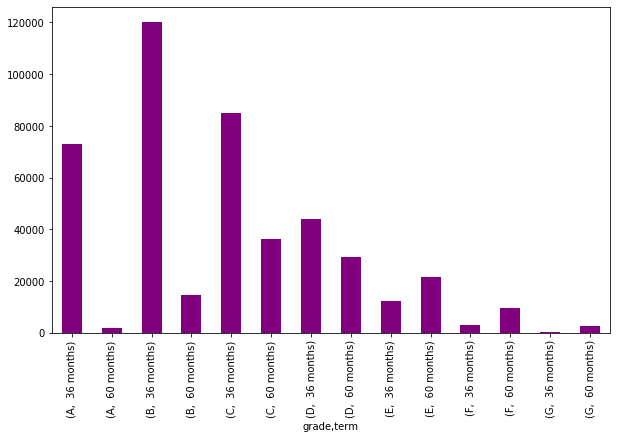

In [121]:
plt.figure(figsize=(10,6))
accepted.groupby(['grade','term']).size().plot(kind ='bar', color ='purple' ) 

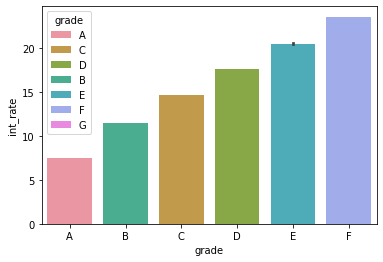

In [122]:
sns.barplot(x="grade",
y='int_rate',
            hue="grade",
data=accepted, dodge = False,order =['A','B','C','D','E','F']) 
plt.style.use('seaborn-colorblind')

In [123]:
accepted.groupby(['grade','sub_grade','term']).size()

grade  sub_grade  term      
A      A1          36 months    10533
       A2          36 months    10924
                   60 months       14
       A3          36 months    12512
                   60 months       41
       A4          36 months    18724
                   60 months      277
       A5          36 months    20130
                   60 months     1418
B      B1          36 months    20835
                   60 months     1755
       B2          36 months    24135
                   60 months     2169
       B3          36 months    27739
                   60 months     3519
       B4          36 months    25706
                   60 months     4192
       B5          36 months    21733
                   60 months     3089
C      C1          36 months    21446
                   60 months     4869
       C2          36 months    19227
                   60 months     6725
       C3          36 months    16714
                   60 months     7747
       C4          36

In [124]:
# dfr =accepted.groupby(['grade','term','loan_status']).size()

In [125]:
accepted.groupby(['grade','term'])['loan_status'].size()

grade  term      
A       36 months     72823
        60 months      1750
B       36 months    120148
        60 months     14724
C       36 months     84881
        60 months     36340
D       36 months     43874
        60 months     29350
E       36 months     12343
        60 months     21538
F       36 months      3083
        60 months      9641
G       36 months       429
        60 months      2723
Name: loan_status, dtype: int64

In [126]:
accepted[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']] 
# 'loan_amnt': The listed amount of the loan applied for by the borrower
#  'funded_amnt' :The total amount committed to that loan at that point in time.
#'funded_amnt_inv' :
#The total amount committed by investors for that loan at that point in time.

,loan_amnt,funded_amnt,funded_amnt_inv
0,10400.0,10400.0,10400.0
1,15000.0,15000.0,15000.0
2,9600.0,9600.0,9600.0
3,7650.0,7650.0,7650.0
4,21425.0,21425.0,21425.0
...,...,...,...
453642,20500.0,20500.0,20500.0
453643,15000.0,15000.0,15000.0
453644,35000.0,35000.0,35000.0
453645,12000.0,12000.0,12000.0


In [127]:
date_cols = [col for col in accepted.columns if 'amnt'in col]
print(date_cols)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'last_pymnt_amnt', 'delinq_amnt']


In [128]:
accepted[(accepted['loan_amnt']-accepted['funded_amnt'])>0]['grade'].sort_values()

247189    A
245860    A
245866    A
245870    A
245879    A
         ..
265353    G
265348    G
262675    G
263541    G
237725    G
Name: grade, Length: 2055, dtype: object

In [129]:
accepted[(accepted['loan_amnt']-accepted['funded_amnt'])<=0].count()

id                            451592
loan_amnt                     451592
funded_amnt                   451592
funded_amnt_inv               451592
term                          451592
int_rate                      451592
installment                   451592
grade                         451592
sub_grade                     451592
emp_title                     451592
emp_length                    451592
home_ownership                451592
annual_inc                    451592
verification_status           451592
issue_d                       451592
loan_status                   451592
pymnt_plan                    451592
url                           451592
purpose                       451592
title                         451592
zip_code                      451592
addr_state                    451592
dti                           451592
delinq_2yrs                   451592
earliest_cr_line              451592
fico_range_low                451592
fico_range_high               451592
i

In [130]:
accepted.shape

(453647, 98)

In [131]:
(466345 -464283)*100/466345


0.4421619187511392

for .44% of the loan the amount requested is less than the amount given, grades from A to G

In [132]:
accepted['funded_amnt'].describe()

count    453647.000000
mean      14142.534614
std        8239.970447
min         500.000000
25%        8000.000000
50%       12000.000000
75%       20000.000000
max       35000.000000
Name: funded_amnt, dtype: float64

In [133]:
accepted['issue_d'] = accepted['issue_d'].astype('datetime64[ns]')

In [134]:
# transform the issue dates by year.
accepted['issue_d'].head()
dt_series = pd.to_datetime(accepted['issue_d'])
accepted['year'] = dt_series.dt.year

In [135]:
accepted['year']

0         2014
1         2014
2         2014
3         2014
4         2014
          ... 
453642    2012
453643    2012
453644    2012
453645    2012
453646    2012
Name: year, Length: 453647, dtype: int64

In [136]:
accepted['issue_d']

0        2014-12-01
1        2014-12-01
2        2014-12-01
3        2014-12-01
4        2014-12-01
            ...    
453642   2012-01-01
453643   2012-01-01
453644   2012-01-01
453645   2012-01-01
453646   2012-01-01
Name: issue_d, Length: 453647, dtype: datetime64[ns]

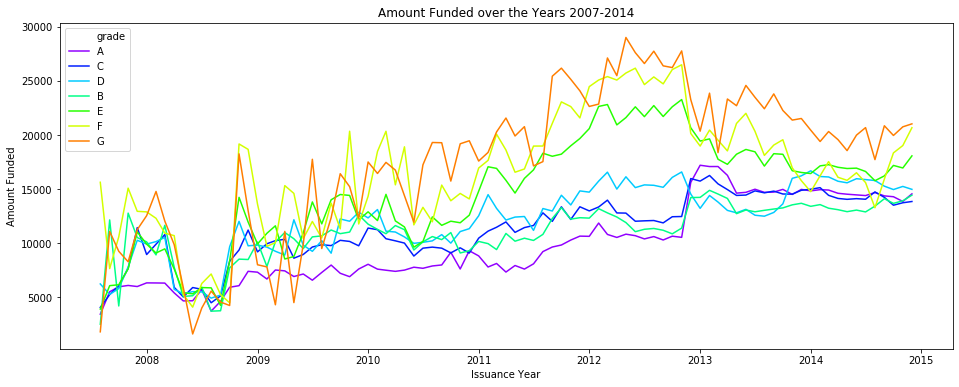

In [137]:
plt.figure(figsize=(16,6))
palette = sns.color_palette("gist_rainbow_r", 7)
sns.lineplot(x="issue_d", y='funded_amnt',hue ='grade',ci= None, 
             palette = palette, data=accepted)
plt.title('Amount Funded over the Years 2007-2014')
plt.xlabel('Issuance Year')
plt.ylabel('Amount Funded')
plt.savefig('AmountFundedovertheYears2007-2014.png')
# afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, 

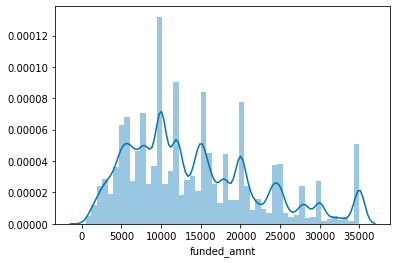

In [138]:
#accepted['funded_amnt']
sns.distplot(accepted['funded_amnt'])

In [139]:
accepted['int_rate']

0          6.99
1         12.39
2         13.66
3         13.66
4         15.59
          ...  
453642    16.77
453643    15.27
453644    15.96
453645    16.29
453646    15.27
Name: int_rate, Length: 453647, dtype: float64

In [140]:
accepted['int_rate_bins'] = pd.cut(x=accepted['int_rate'], bins=5)
accepted['int_rate_bins'] 

0           (5.399, 9.548]
1          (9.548, 13.676]
2          (9.548, 13.676]
3          (9.548, 13.676]
4         (13.676, 17.804]
                ...       
453642    (13.676, 17.804]
453643    (13.676, 17.804]
453644    (13.676, 17.804]
453645    (13.676, 17.804]
453646    (13.676, 17.804]
Name: int_rate_bins, Length: 453647, dtype: category
Categories (5, interval[float64]): [(5.399, 9.548] < (9.548, 13.676] < (13.676, 17.804] < (17.804, 21.932] < (21.932, 26.06]]

In [141]:
accepted['int_rate_bins'].nunique()

5

In [142]:
accepted['purpose']

0                credit_card
1         debt_consolidation
2         debt_consolidation
3         debt_consolidation
4                credit_card
                 ...        
453642    debt_consolidation
453643        small_business
453644        small_business
453645                 other
453646           credit_card
Name: purpose, Length: 453647, dtype: object

In [143]:
accepted.groupby(['grade','purpose']).size()

grade  purpose           
A      car                    1586
       credit_card           23309
       debt_consolidation    37039
       educational              87
       home_improvement       5056
       house                   348
       major_purchase         2448
       medical                 513
       moving                  293
       other                  2336
       renewable_energy         52
       small_business          769
       vacation                288
       wedding                 449
B      car                    1621
       credit_card           36760
       debt_consolidation    77765
       educational             109
       home_improvement       7294
       house                   496
       major_purchase         2714
       medical                 915
       moving                  501
       other                  4391
       renewable_energy         71
       small_business         1189
       vacation                495
       wedding               

In [144]:
accepted['purpose'].nunique()

14

In [145]:
accepted['purpose'].value_counts()

debt_consolidation    266307
credit_card           101195
home_improvement       25774
other                  23232
major_purchase          9641
small_business          6899
car                     5320
medical                 4529
moving                  2951
vacation                2464
wedding                 2340
house                   2241
educational              407
renewable_energy         347
Name: purpose, dtype: int64

In [146]:
accepted['loan_status'].value_counts()

FullyPaid    376150
Defaulted     77497
Name: loan_status, dtype: int64

In [147]:
# looking at only defaulted loans:
default_cat = ['Default', 'Charged Off', 'Does not meet the credit policy. Status:Charged Off']

In [148]:
pd.options.display.max_rows

120

In [149]:
pd.options.display.max_rows = 120

In [150]:
accepted.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453647 entries, 0 to 453646
Data columns (total 100 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   id                          453647 non-null  int64         
 1   loan_amnt                   453647 non-null  float64       
 2   funded_amnt                 453647 non-null  float64       
 3   funded_amnt_inv             453647 non-null  float64       
 4   term                        453647 non-null  object        
 5   int_rate                    453647 non-null  float64       
 6   installment                 453647 non-null  float64       
 7   grade                       453647 non-null  object        
 8   sub_grade                   453647 non-null  object        
 9   emp_title                   453647 non-null  object        
 10  emp_length                  453647 non-null  object        
 11  home_ownership              453647 non

In [151]:
accepted[['grade','sub_grade','loan_status']]

,grade,sub_grade,loan_status
0,A,A3,Defaulted
1,C,C1,FullyPaid
2,C,C3,FullyPaid
3,C,C3,Defaulted
4,D,D1,FullyPaid
...,...,...,...
453642,D,D2,FullyPaid
453643,C,C4,FullyPaid
453644,C,C5,FullyPaid
453645,D,D1,Defaulted


# Good and Bad Loans


In [152]:
# good_loan =['Does not meet the credit policy. Status:Fully Paid', 'Fully Paid']
# transition_loan =['Current', 'In Grace Period', 'Late (16-30 days)']
# bad_loan =['Charged Off', 'Late (31-120 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off']

In [153]:
accepted['loan_status'].value_counts()

FullyPaid    376150
Defaulted     77497
Name: loan_status, dtype: int64

In [154]:
accepted['loan_status'].value_counts()/len(accepted['loan_status'])

FullyPaid    0.829169
Defaulted    0.170831
Name: loan_status, dtype: float64

[Text(0, 0.5, '(%)')]

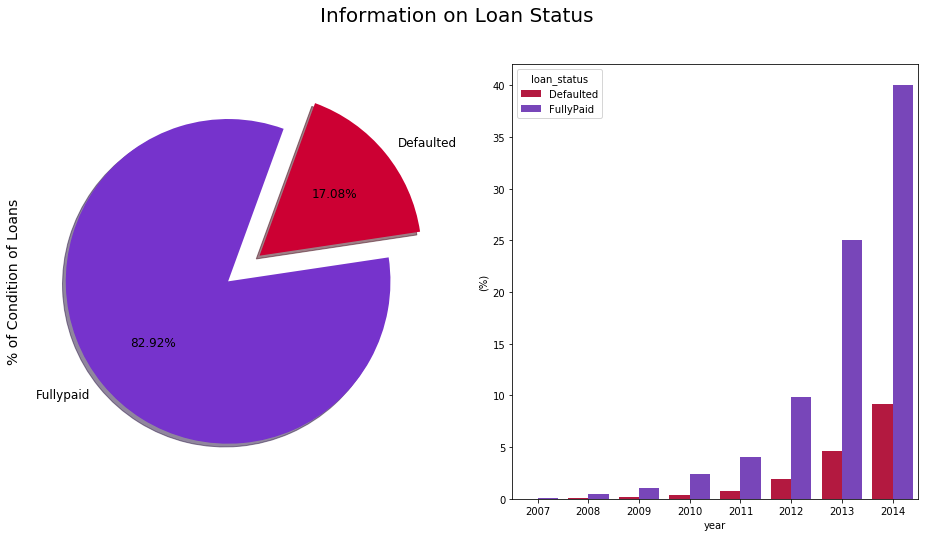

In [156]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#7633cc", "#cc0033"]
labels ="Fullypaid", "Defaulted"

plt.suptitle('Information on Loan Status', fontsize=20)

accepted["loan_status"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                            labels=labels, fontsize=12, startangle=70)


ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

palette = [ "#cc0033","#7633cc"]

sns.barplot(x="year", y="loan_amnt", hue="loan_status", data=accepted, palette=palette, estimator=lambda x: len(x) / len(accepted) * 100)
ax[1].set(ylabel="(%)")

# Defaulted Loans by grades


In [157]:
tsevere=accepted[accepted['loan_status']== 'Defaulted'].groupby(['grade','term','loan_status']).size()
tsevere = (tsevere*100)/len(accepted[accepted['loan_status']== 'Defaulted'])
tsevere.sort_values(inplace =True)
tsevere

grade  term        loan_status
A       60 months  Defaulted       0.189685
G       36 months  Defaulted       0.189685
F       36 months  Defaulted       1.145851
G       60 months  Defaulted       1.508445
B       60 months  Defaulted       3.081410
E       36 months  Defaulted       4.022091
F       60 months  Defaulted       4.880189
A       36 months  Defaulted       5.198911
E       60 months  Defaulted      10.166845
C       60 months  Defaulted      11.071396
D       60 months  Defaulted      11.810780
        36 months  Defaulted      12.021110
B       36 months  Defaulted      16.574835
C       36 months  Defaulted      18.138767
dtype: float64

In [158]:
tsevere.describe()

count    14.000000
mean      7.142857
std       6.073739
min       0.189685
25%       1.901687
50%       5.039550
75%      11.625934
max      18.138767
dtype: float64

In [159]:
severe=accepted[accepted['loan_status']== 'Defaulted'].groupby(['grade','term','loan_status']).size()
severe = (severe*100)/len(accepted[accepted['loan_status']== 'Defaulted'])
severe = severe[severe>=5.039550]
severe.sort_values(inplace =True)
severe

grade  term        loan_status
A       36 months  Defaulted       5.198911
E       60 months  Defaulted      10.166845
C       60 months  Defaulted      11.071396
D       60 months  Defaulted      11.810780
        36 months  Defaulted      12.021110
B       36 months  Defaulted      16.574835
C       36 months  Defaulted      18.138767
dtype: float64

Text(0, 0.5, 'Default Percentage')

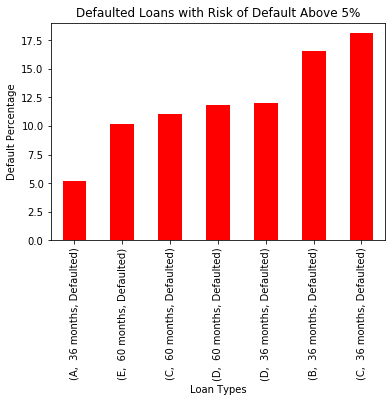

In [160]:
severe.plot(kind='bar', color='red')
plt.title('Defaulted Loans with Risk of Default Above 5%')
plt.xlabel('Loan Types')
plt.ylabel('Default Percentage')

In [161]:
lsevere=accepted[accepted['loan_status']== 'Defaulted'].groupby(['grade','term','loan_status']).size()
lsevere = (lsevere*100)/len(accepted[accepted['loan_status']== 'Defaulted'])
lsevere = lsevere[lsevere<5.039550]
lsevere.sort_values(inplace =True)
lsevere

grade  term        loan_status
A       60 months  Defaulted      0.189685
G       36 months  Defaulted      0.189685
F       36 months  Defaulted      1.145851
G       60 months  Defaulted      1.508445
B       60 months  Defaulted      3.081410
E       36 months  Defaulted      4.022091
F       60 months  Defaulted      4.880189
dtype: float64

Text(0, 0.5, 'Default Percentage')

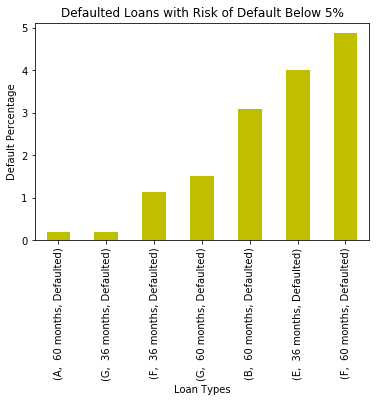

In [162]:
lsevere.plot(kind='bar', color ='y')
plt.title('Defaulted Loans with Risk of Default Below 5%')
plt.xlabel('Loan Types')
plt.ylabel('Default Percentage')

# by subgrades


In [163]:
tsevere2=accepted[accepted['loan_status']== 'Defaulted'].groupby(['grade','sub_grade','term','loan_status']).size()
tsevere2 = (tsevere2*100)/len(accepted[accepted['loan_status']== 'Defaulted'])
tsevere2

grade  sub_grade  term        loan_status
A      A1          36 months  Defaulted      0.379370
       A2          36 months  Defaulted      0.610346
                   60 months  Defaulted      0.001290
       A3          36 months  Defaulted      0.771643
                   60 months  Defaulted      0.001290
       A4          36 months  Defaulted      1.489090
                   60 months  Defaulted      0.032259
       A5          36 months  Defaulted      1.948463
                   60 months  Defaulted      0.154845
B      B1          36 months  Defaulted      2.283959
                   60 months  Defaulted      0.267107
       B2          36 months  Defaulted      2.907209
                   60 months  Defaulted      0.389693
       B3          36 months  Defaulted      3.820793
                   60 months  Defaulted      0.661961
       B4          36 months  Defaulted      3.836278
                   60 months  Defaulted      0.989716
       B5          36 months  Defaulted 

In [164]:
tsevere2.describe()

count    69.000000
mean      1.449275
std       1.230290
min       0.001290
25%       0.358724
50%       1.127786
75%       2.330413
max       3.987251
dtype: float64

Text(0.5, 0, 'Default Percentage')

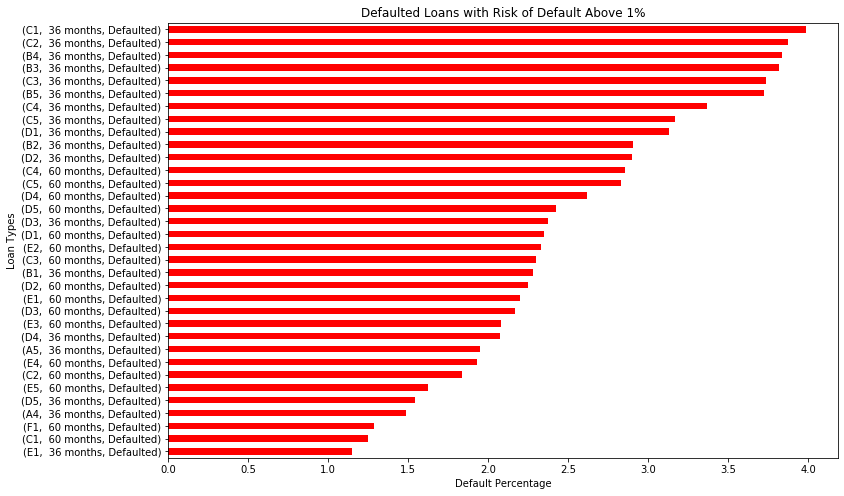

In [165]:
plt.figure(figsize =(12,8))
severe2=accepted[accepted['loan_status']== 'Defaulted'].groupby(['sub_grade','term','loan_status']).size()
severe2 = (severe2*100)/len(accepted[accepted['loan_status']== 'Defaulted'])
severe2 = severe2[severe2 >=1.127786]
severe2.sort_values(inplace =True)
severe2.plot(kind ='barh', color ='r')
plt.title('Defaulted Loans with Risk of Default Above 1%')
plt.ylabel('Loan Types')
plt.xlabel('Default Percentage')

Text(0.5, 0, 'Default Percentage')

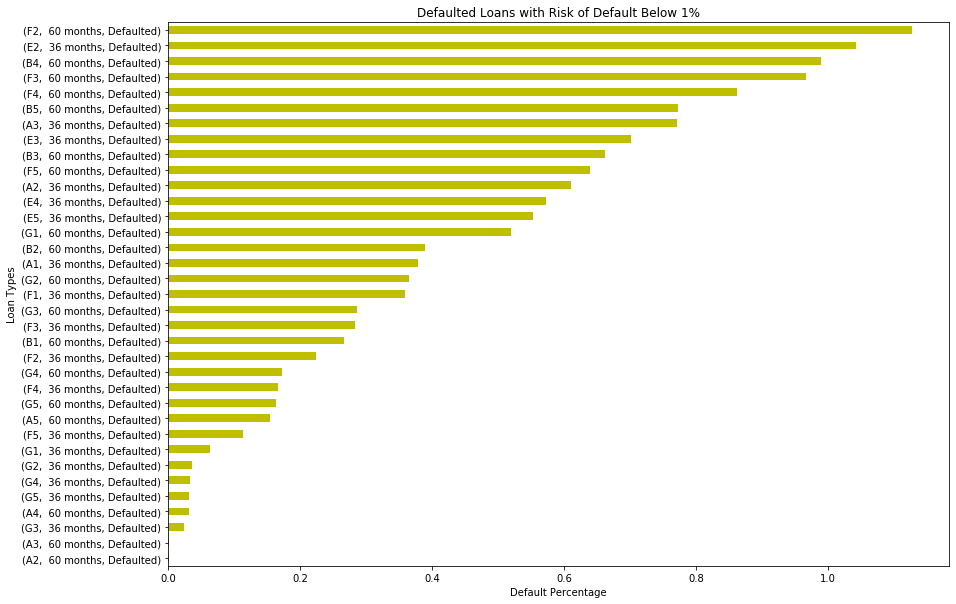

In [166]:
plt.figure(figsize =(14,10))
lsevere2=accepted[accepted['loan_status']== 'Defaulted'].groupby(['sub_grade','term','loan_status']).size()
lsevere2 = (lsevere2*100)/len(accepted[accepted['loan_status']== 'Defaulted'])
lsevere2 = lsevere2[lsevere2<1.127786]
lsevere2.sort_values(inplace =True)
lsevere2.plot(kind ='barh', color ='y')
plt.title('Defaulted Loans with Risk of Default Below 1%')
plt.ylabel('Loan Types')
plt.xlabel('Default Percentage')

In [167]:
# accepted[accepted.groupby(['grade','sub_grade','term','loan_status'])]
# (accepted[accepted['loan_status']== 'Defaulted'].groupby(['grade','term','loan_status']).size())*100/len(accepted['loan_status'])

In [168]:
 (accepted[accepted['loan_status']== 'Defaulted'].groupby(['grade','sub_grade','term','loan_status']).size())*100/len(accepted[accepted['loan_status']== 'Defaulted'])

grade  sub_grade  term        loan_status
A      A1          36 months  Defaulted      0.379370
       A2          36 months  Defaulted      0.610346
                   60 months  Defaulted      0.001290
       A3          36 months  Defaulted      0.771643
                   60 months  Defaulted      0.001290
       A4          36 months  Defaulted      1.489090
                   60 months  Defaulted      0.032259
       A5          36 months  Defaulted      1.948463
                   60 months  Defaulted      0.154845
B      B1          36 months  Defaulted      2.283959
                   60 months  Defaulted      0.267107
       B2          36 months  Defaulted      2.907209
                   60 months  Defaulted      0.389693
       B3          36 months  Defaulted      3.820793
                   60 months  Defaulted      0.661961
       B4          36 months  Defaulted      3.836278
                   60 months  Defaulted      0.989716
       B5          36 months  Defaulted 

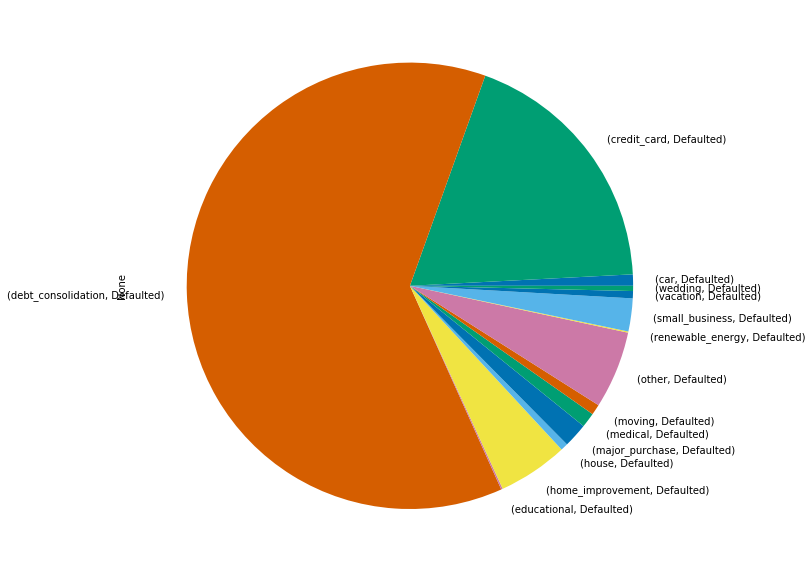

In [169]:
plt.figure(figsize =(10,12))
XB =(accepted[accepted['loan_status']== 'Defaulted'].groupby(['purpose','loan_status']).size())*100/len(accepted[accepted['loan_status']== 'Defaulted'])
XB.plot(kind ='pie')

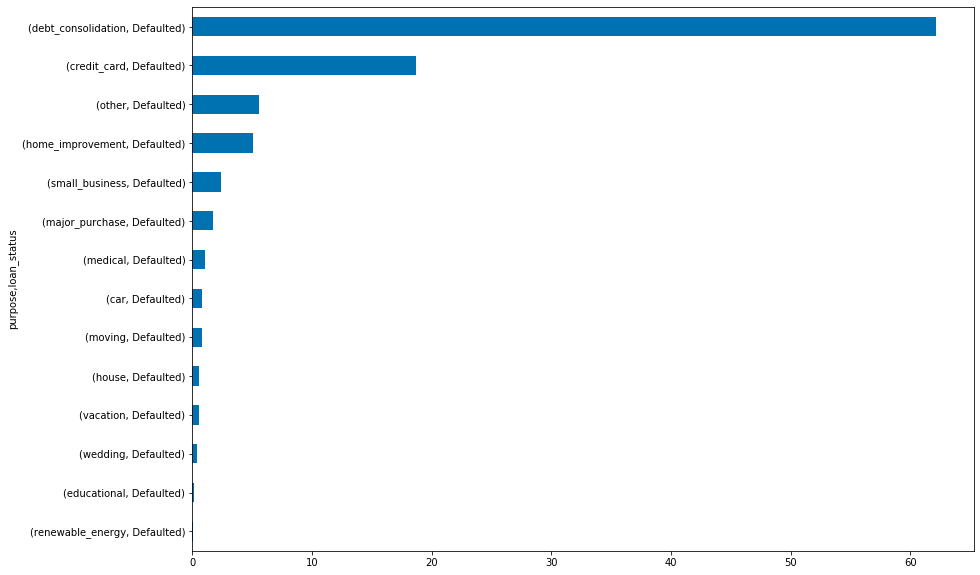

In [170]:
plt.figure(figsize =(14,10))
XB =(accepted[accepted['loan_status']== 'Defaulted'].groupby(['purpose','loan_status']).size())*100/len(accepted[accepted['loan_status']== 'Defaulted'])
XB.sort_values(inplace =True)
XB.plot(kind ='barh')


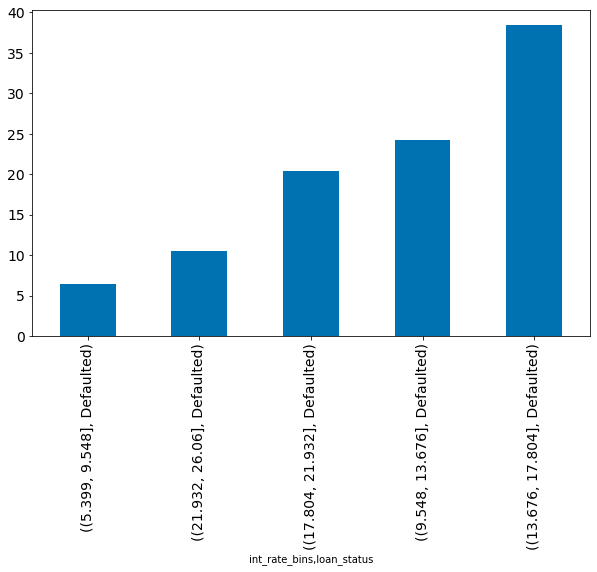

In [286]:
plt.figure(figsize =(10,6))
XB =(accepted[accepted['loan_status']== 'Defaulted'].groupby(['int_rate_bins','loan_status']).size())*100/len(accepted[accepted['loan_status']== 'Defaulted'])
XB.sort_values(inplace =True)
XB.plot(kind ='bar')

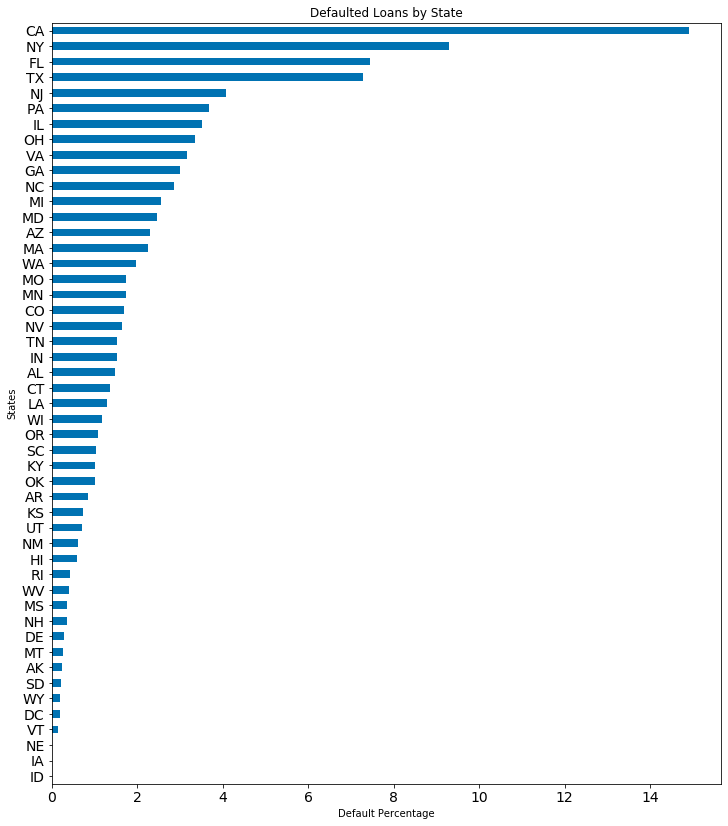

In [289]:
import matplotlib  
matplotlib.rc('xtick', labelsize=14)     
matplotlib.rc('ytick', labelsize=14)
plt.figure(figsize =(12,14))
XB =(accepted[accepted['loan_status']== 'Defaulted'].groupby(['addr_state']).size())*100/len(accepted[accepted['loan_status']== 'Defaulted'])
XB.sort_values(inplace =True)
XB.plot(kind ='barh')
plt.title('Defaulted Loans by State')
plt.ylabel('States')
plt.xlabel('Default Percentage')
plt.savefig('Satesdefault.png')

In [173]:
# accepted[accepted['loan_status'] == 'Default'].describe().T

Text(0, 0.5, 'Loan amount issued')

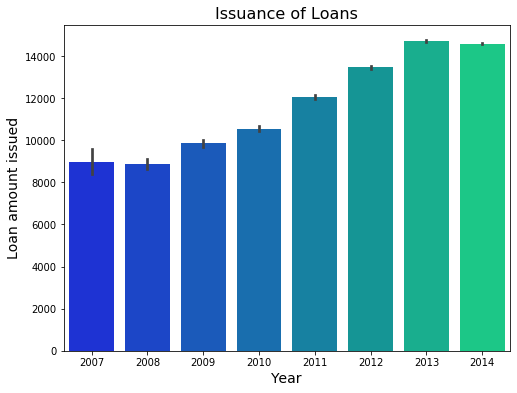

In [174]:
plt.figure(figsize=(8,6))
sns.barplot('year', 'loan_amnt', data=accepted, palette='winter')
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Loan amount issued', fontsize=14)

Text(0, 0.5, 'Loan amount issued')

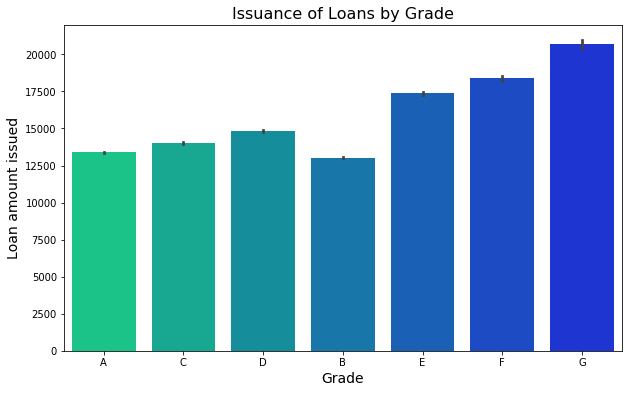

In [175]:
plt.figure(figsize=(10,6))
sns.barplot('grade', 'loan_amnt', data=accepted, palette='winter_r')
plt.title('Issuance of Loans by Grade', fontsize=16)
plt.xlabel('Grade', fontsize=14)
plt.ylabel('Loan amount issued', fontsize=14)

Text(0, 0.5, 'Interest Rates')

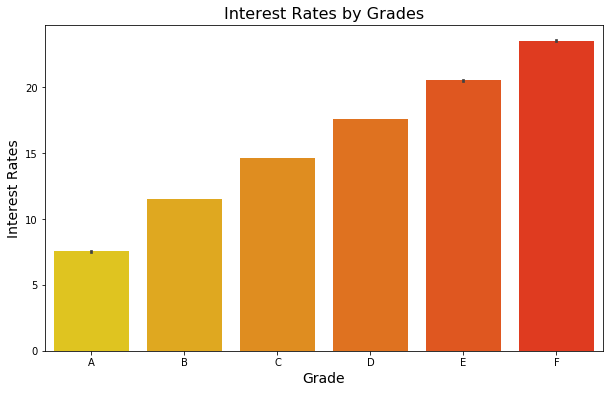

In [176]:
# accepted['int_rate_s'] =accepted['int_rate'].sort_values()
plt.figure(figsize=(10,6))
sns.barplot('grade', 'int_rate', data=accepted, palette='autumn_r',order =['A','B','C','D','E','F'])
plt.title('Interest Rates by Grades', fontsize=16)
plt.xlabel('Grade', fontsize=14)
plt.ylabel('Interest Rates', fontsize=14)

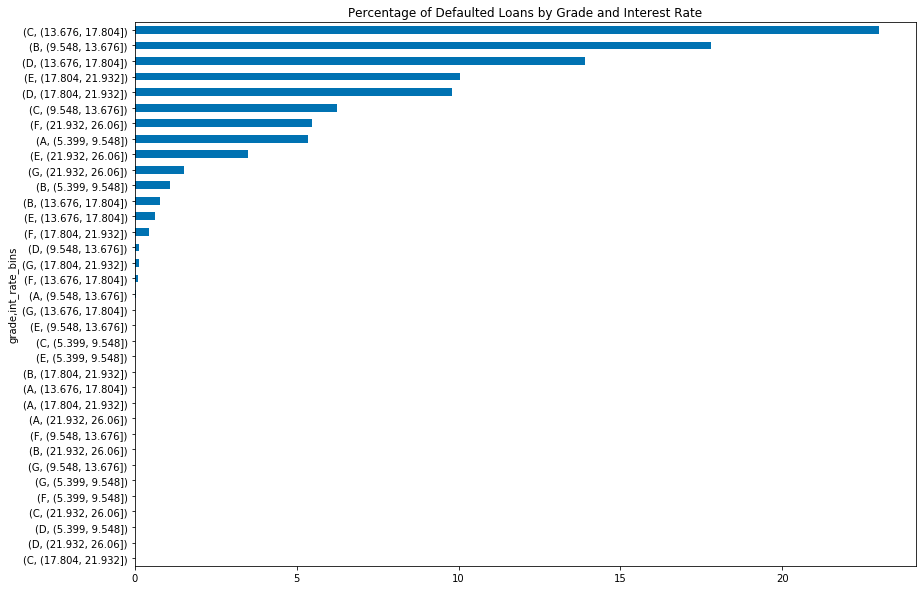

In [177]:
plt.figure(figsize =(14,10))
XB1 =(accepted[accepted['loan_status']=='Defaulted'].groupby(['grade','int_rate_bins']).size())*100/len(accepted[accepted['loan_status']== 'Defaulted'])
XB1.sort_values(inplace =True)
XB1.plot(kind ='barh', title ='Percentage of Defaulted Loans by Grade and Interest Rate')

# Loans and credit scores


In [178]:
#Loan issued by credit score [accepted['grade', 'subgrade','term','loan_status', 'fico_range_low', 'fico_range_high']]

In [181]:
accepted.groupby(['grade', 'sub_grade','term','loan_status','fico_range_low']).size()

grade  sub_grade  term        loan_status  fico_range_low
A      A1          36 months  Defaulted    660.0             2
                                           665.0             5
                                           670.0             3
                                           675.0             4
                                           680.0             3
                                                            ..
G      G5          60 months  FullyPaid    700.0             7
                                           705.0             3
                                           710.0             1
                                           725.0             1
                                           755.0             1
Length: 3585, dtype: int64

In [182]:
#...

# Diversification: Portofolio building


In [183]:
def loan_length(d1, d2):
    d1 = pd.to_datetime(d1)
    d2 = pd.to_datetime(d2)
    return (d1.year - d2.year) * 12 + d1.month - d2.month

In [184]:
loan_months = []
for end, start in zip(accepted['last_pymnt_d'], accepted['issue_d']):
    loan_months.append(loan_length(end, start))

In [185]:
accepted['loan_duration'] = loan_months

In [186]:
accepted['loan_duration'] 

0         20
1         18
2          4
3          8
4         17
          ..
453642    34
453643    36
453644    35
453645     3
453646    59
Name: loan_duration, Length: 453647, dtype: int64

In [187]:
import re
accepted["term"] = accepted["term"].apply(lambda x: re.sub('months', '',x)).astype('int64')                         
# accepted['term'] = accepted['term'].str.replace(r'\D', '').astype(int)

In [188]:
accepted["term"]

0         36
1         60
2         36
3         36
4         60
          ..
453642    36
453643    36
453644    36
453645    36
453646    60
Name: term, Length: 453647, dtype: int64

# 20 equal-dollar investments in 20 grade A loans


In [189]:
# accepted[accepted['loan_completion']=="Completed loan"]['grade']== 'A'

In [190]:
np.random.seed(42)
p1 =accepted[accepted['grade']=="A"].sample(n=20)
p1

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,hardship_flag,disbursement_method,debt_settlement_flag,duration_days,invest_return,invest_return_per,duration_months,year,int_rate_bins,loan_duration
377229,3848317,18000.0,18000.0,17925.0,36,6.03,547.84,A,A1,Syncsort Inc.,...,N,Cash,N,183,509.724409,0.028318,6,2013,"(5.399, 9.548]",6
221488,9208564,16000.0,16000.0,16000.0,36,7.90,500.65,A,A4,Senior Database Administrator,...,N,Cash,N,1096,2023.159734,0.126447,36,2014,"(5.399, 9.548]",36
53065,29824583,18000.0,18000.0,18000.0,36,7.69,561.49,A,A4,Superintendent,...,N,Cash,N,1096,2205.706315,0.122539,36,2014,"(5.399, 9.548]",36
385932,3381647,3000.0,3000.0,3000.0,36,8.90,95.26,A,A5,CA Dept. of Corrections,...,N,Cash,N,1095,429.345020,0.143115,36,2013,"(5.399, 9.548]",36
243626,661368,5300.0,5300.0,5300.0,36,5.42,159.85,A,A1,Weis Markets,...,N,Cash,N,1127,455.058628,0.085860,37,2011,"(5.399, 9.548]",37
111550,20681421,10000.0,10000.0,10000.0,36,6.49,306.45,A,A2,Attorney,...,N,Cash,N,365,580.840000,0.058084,12,2014,"(5.399, 9.548]",12
83013,23143668,9450.0,9450.0,9450.0,36,8.39,297.84,A,A5,Mortgage Loan Officer,...,N,Cash,N,943,1251.378204,0.132421,31,2014,"(5.399, 9.548]",31
277831,9196998,21000.0,21000.0,21000.0,36,7.90,657.10,A,A4,Assistant Principal,...,N,Cash,N,1096,2655.411133,0.126448,36,2013,"(5.399, 9.548]",36
287849,8146373,5500.0,5500.0,5500.0,36,7.90,172.10,A,A4,Nurse,...,N,Cash,N,912,672.469998,0.122267,30,2013,"(5.399, 9.548]",30
345202,5964908,12000.0,12000.0,12000.0,36,7.90,375.49,A,A4,Shooster Developement,...,N,Cash,N,914,1471.629998,0.122636,30,2013,"(5.399, 9.548]",30


In [191]:
# 20 equal-dollar investments in 20 grade A loans.

In [192]:
p1['funded_amnt_inv']=20


In [193]:
p1['funded_amnt_inv']


377229    20
221488    20
53065     20
385932    20
243626    20
111550    20
83013     20
277831    20
287849    20
345202    20
89712     20
231159    20
81504     20
243139    20
245874    20
250247    20
277717    20
293613    20
288650    20
260174    20
Name: funded_amnt_inv, dtype: int64

In [194]:
# A = P*i*((1+i)**n)/(((1+i)**n)-1)
p1['term']

377229    36
221488    36
53065     36
385932    36
243626    36
111550    36
83013     36
277831    36
287849    36
345202    36
89712     36
231159    36
81504     36
243139    36
245874    36
250247    36
277717    36
293613    36
288650    36
260174    36
Name: term, dtype: int64

In [195]:
p1['int_rate']

377229    6.03
221488    7.90
53065     7.69
385932    8.90
243626    5.42
111550    6.49
83013     8.39
277831    7.90
287849    7.90
345202    7.90
89712     7.69
231159    5.42
81504     6.03
243139    5.42
245874    6.91
250247    7.88
277717    7.90
293613    7.90
288650    7.90
260174    8.00
Name: int_rate, dtype: float64

In [196]:
#p1['int_rate']
p1['A'] =(p1['funded_amnt_inv']*(p1['int_rate']/1200)*((1+(p1['int_rate']/1200))**p1['term']))/(((1+(p1['int_rate']/1200))**p1['term'])-1)

In [197]:
p1['A']

377229    0.608711
221488    0.625805
53065     0.623871
385932    0.635064
243626    0.603197
111550    0.612889
83013     0.630332
277831    0.625805
287849    0.625805
345202    0.625805
89712     0.623871
231159    0.603197
81504     0.608711
243139    0.603197
245874    0.616719
250247    0.625621
277717    0.625805
293613    0.625805
288650    0.625805
260174    0.626727
Name: A, dtype: float64

In [198]:
p1["return"] = (p1['A']*p1["term"])-p1['funded_amnt_inv']

In [199]:
p1["return"]

377229    1.913583
221488    2.528983
53065     2.459358
385932    2.862313
243626    1.715079
111550    2.064005
83013     2.691946
277831    2.528983
287849    2.528983
345202    2.528983
89712     2.459358
231159    1.715079
81504     1.913583
243139    1.715079
245874    2.201894
250247    2.522346
277717    2.528983
293613    2.528983
288650    2.528983
260174    2.562183
Name: return, dtype: float64

# 100 equal-dollar investments in 100 grade A loans


In [200]:
np.random.seed(2)
p2 =accepted[accepted['grade']=="A"].sample(n=100)
p2.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,hardship_flag,disbursement_method,debt_settlement_flag,duration_days,invest_return,invest_return_per,duration_months,year,int_rate_bins,loan_duration
241813,690171,7000.0,7000.0,6950.0,36,5.79,212.29,A,A2,NYC Department of Corrections,...,N,Cash,N,1096,642.367023,0.091767,36,2011,"(5.399, 9.548]",36
401967,2382789,12000.0,12000.0,12000.0,36,7.90,375.49,A,A4,CCSD #1,...,N,Cash,N,730,1334.139996,0.111178,24,2012,"(5.399, 9.548]",24
426649,1465509,10000.0,10000.0,10000.0,36,8.90,317.54,A,A5,WideOrbit,...,N,Cash,N,1095,1431.120000,0.143112,36,2012,"(5.399, 9.548]",36
25095,34382861,9000.0,9000.0,9000.0,36,8.19,282.82,A,A5,Underwriter,...,N,Cash,N,426,728.040000,0.080893,14,2014,"(5.399, 9.548]",14
2201,36390576,15000.0,15000.0,14975.0,36,8.19,471.37,A,A5,Therpiast,...,N,Cash,N,731,1745.453481,0.116364,24,2014,"(5.399, 9.548]",24


In [201]:
p2['funded_amnt_inv']=100

In [202]:
p2['A'] =(p2['funded_amnt_inv']*(p2['int_rate']/1200)*((1+(p2['int_rate']/1200))**p2['term']))/(((1+(p2['int_rate']/1200))**p2['term'])-1)

In [203]:
p2["return"] = (p2['A']*p2["term"])-p2['funded_amnt_inv']
p2["return"]

241813     9.176757
401967    12.644914
426649    14.311563
25095     13.126725
2201      13.126725
152921    14.311563
452271    12.644914
26132     10.320025
303730    13.810021
440681    12.644914
227361    14.311563
452869    10.533146
389038    12.644914
274350    12.644914
55617     11.355172
282813    12.644914
433400     9.567916
353284     9.567916
218517    14.311563
330941    14.311563
111124    11.355172
244139    11.025918
418011    12.180896
96073     13.459730
178143    10.533146
284474    10.533146
453085    10.533146
379769    14.311563
390790    10.533146
236655    11.141090
149647    10.320025
101804    11.355172
254720    11.998920
303978    14.898369
442122    12.644914
213579    14.311563
3594      13.126725
277305    10.533146
204118    10.533146
284522    12.644914
84436     10.320025
148877    13.459730
417244    12.644914
363684    14.311563
173167    10.533146
258091    14.378535
233417    11.965852
208856    14.311563
402683    14.311563
441275    12.644914


# 20 equal-dollar investments in 5+5+5+5 loans in grade 𝐴,𝐵,𝐶,𝐷 , respectively, 5 in each grade


In [204]:
np.random.seed(2)
# p2 =accepted[accepted['grade']=="A"].sample(n=100)
# p2.head(5)
rowsg =['A','B','C','D']

p3 =accepted[accepted['grade'].isin(rowsg)].groupby('grade')

p3= p3.apply(lambda x: x.sample(n=5, replace=True)).head(15)
p3
# grouped = accepted.groupby('grade')
# grouped.apply(lambda x: x.sample(n=5, replace=True)).head(15)

id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
grade                                                                   
A     445434   1203836    14000.0      14000.0          14000.0    36   
      257151    461664     4000.0       4000.0           4000.0    36   
      190868  12427809    12000.0      12000.0          12000.0    36   
      210544  10934719    12000.0      12000.0          12000.0    36   
      256006    479291     3000.0       3000.0           3000.0    36   
B     203231  10588358    15000.0      15000.0          14950.0    36   
      127853  19075382     9000.0       9000.0           9000.0    36   
      166555  14608197     6000.0       6000.0           6000.0    36   
      136533  17685443    31000.0      31000.0          30900.0    36   
      258571    438885     2200.0       2200.0           2200.0    36   
C     39178   32178345     6000.0       6000.0           6000.0    36   
      116712  20258087    10000.0      10000.0          10000.0    36   
      186689  12616570    29000.0      29000.0          29000.0    36   
      268552   8967818    11300.0      11300.0          11300.0    36   
      148768  16441290    16725.0      16725.0          16725.0    36   

              int_rate  installment grade sub_grade  \
grade                                                 
A     445434      8.90       444.55     A        A5   
      257151      7.74       124.88     A        A3   
      190868      8.90       381.04     A        A5   
      210544      7.90       375.49     A        A4   
      256006      7.51        93.33     A        A4   
B     203231     12.85       504.33     B        B4   
      127853     11.67       297.52     B        B4   
      166555     11.99       199.26     B        B3   
      136533     12.49      1036.92     B        B5   
      258571     11.48        72.54     B        B2   
C     39178      13.35       203.18     C        C2   
      116712     13.35       338.63     C        C2   
      186689     14.16       993.41     C        C2   
      268552     13.98       386.10     C        C1   
      148768     12.99       563.46     C        C1   

                                 emp_title  ... hardship_flag  \
grade                                       ...                 
A     445434       Clarity medical Systems  ...             N   
      257151              civil works corp  ...             N   
      190868                        Solier  ...             N   
      210544                        Driver  ...             N   
      256006        Sunshine Bible Academy  ...             N   
B     203231        DIRECTOR OF OPERATIONS  ...             N   
      127853                  Unit Manager  ...             N   
      166555                Staff Sergeant  ...             N   
      136533               Unit Supervisor  ...             N   
      258571       NORCAL Mutual Insurance  ...             N   
C     39178       Accounts Payable Analyst  ...             N   
      116712            Packaging Engineer  ...             N   
      186689       Senior Research Manager  ...             N   
      268552  customer service-call center  ...             N   
      148768              Highway Worker 1  ...             N   

             disbursement_method  debt_settlement_flag duration_days  \
grade                                                                  
A     445434                Cash                     N           760   
      257151                Cash                     N          1126   
      190868                Cash                     N          1096   
      210544                Cash                     N          1127   
      256006                Cash                     N           820   
B     203231                Cash                     N           577   
      127853                Cash                     N           639   
      166555                Cash                     N            30   
      136533    

In [205]:
p3['funded_amnt_inv']=100

In [206]:
p3['A'] =(p3['funded_amnt_inv']*(p3['int_rate']/1200)*((1+(p3['int_rate']/1200))**p3['term']))/(((1+(p3['int_rate']/1200))**p3['term'])-1)

In [207]:
p3["return"] = (p3['A']*p3["term"])-p3['funded_amnt_inv']
p3["return"]

grade        
A      445434    14.311563
       257151    12.379619
       190868    14.311563
       210544    12.644914
       256006    11.998920
B      203231    21.038293
       127853    19.004897
       166555    19.554322
       136533    20.415786
       258571    18.679383
C      39178     21.906011
       116712    21.906011
       186689    23.319410
       268552    23.004500
       148768    21.280888
Name: return, dtype: float64

# 100 equal-dollar investments in 25+25+25+25 loans in grade 𝐴,𝐵,𝐶,𝐷 , respectively, 25 loans in each grade




In [208]:
np.random.seed(2)
# p2 =accepted[accepted['grade']=="A"].sample(n=100)
# p2.head(5)
rowsg =['A','B','C','D']

p4 =accepted[accepted['grade'].isin(rowsg)].groupby('grade')

p4 =p4.apply(lambda x: x.sample(n=25, replace=True))
p4

id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
grade                                                                   
A     445434   1203836    14000.0      14000.0     14000.000000    36   
      257151    461664     4000.0       4000.0      4000.000000    36   
      190868  12427809    12000.0      12000.0     12000.000000    36   
      210544  10934719    12000.0      12000.0     12000.000000    36   
      256006    479291     3000.0       3000.0      3000.000000    36   
      321695   6835299     7500.0       7500.0      7500.000000    36   
      206038  11446673     6600.0       6600.0      6600.000000    36   
      252805    521710    19200.0      12150.0     11225.665477    36   
      221015  10160850    25000.0      25000.0     25000.000000    36   
      439969   1287625     3000.0       3000.0      3000.000000    36   
      58116   29204040     5000.0       5000.0      5000.000000    36   
      198277  11986060    21600.0      21600.0     21600.000000    36   
      302767   7728033    14000.0      14000.0     14000.000000    36   
      445109   1200691    14000.0      14000.0     14000.000000    60   
      243138    669409     9000.0       9000.0      8975.000000    36   
      302264   7687257    10000.0      10000.0     10000.000000    36   
      121728  19986772     9800.0       9800.0      9800.000000    36   
      381705   3627502     9000.0       9000.0      9000.000000    36   
      43805   31276957    23000.0      23000.0     23000.000000    60   
      83148   12957766    20000.0      20000.0     20000.000000    36   
      111123  20691995    17500.0      17500.0     17500.000000    36   
      87767   23946253     7200.0       7200.0      7200.000000    36   
      346499   5770652    14000.0      14000.0     14000.000000    36   
      240397    722015    11200.0      11200.0     11200.000000    36   
      335405   6300628     9600.0       9600.0      9600.000000    36   
B     380379   3667533    26000.0      26000.0     26000.000000    36   
      357502   4915711    15000.0      15000.0     15000.000000    36   
      400103   2784771    15000.0      15000.0     14825.000000    36   
      76791   26218255    14000.0      14000.0     14000.000000    36   
      439027   1306732    14400.0      14400.0     14400.000000    36   
      196187  11936480    12000.0      12000.0     12000.000000    36   
      439722    843448     5500.0       5500.0      5500.000000    36   
      224454   1055239    17000.0      17000.0     16994.625041    36   
      335554   5793705     2800.0       2800.0      2750.000000    36   
      386303   3369768    24000.0      24000.0     24000.000000    60   
      439938   1292053    10000.0      10000.0     10000.000000    36   
      120714  19918047     3500.0       3500.0      3500.000000    36   
      101791  22081678    15000.0      15000.0     15000.000000    36   
      87112   19207338    21000.0      21000.0     21000.000000    60   
      127597  19116529     9000.0       9000.0      9000.000000    36   
      202470  11656484    30000.0      30000.0     30000.000000    36   
      73475   26629651    35000.0      35000.0     35000.000000    60   
      138160  17594166     7000.0       7000.0      7000.000000    36   
      91162   23974502     4800.0       4800.0      4800.000000    36   
      86130   24785169    17000.0      17000.0     17000.000000    36   
      146522  14550482    12000.0      12000.0     12000.000000    36   
      132284  18575905    12000.0      12000.0     12000.000000    60   
      317683   7096797    17600.0      17600.0     17575.000000    36   
      54374   29744867    10000.0      10000.0     10000.000000    36   
      113952  20528628    12000.0      12000.0     12000.000000    36   
C     201746  11455575    11800.0      11800.0     11800.000000    36   
      299602   7925958    15000.0      15000.0     15000.000000    36   
      333078   6404684     8500.0       8500.0      8500.000000    36   
     

In [209]:
p4['funded_amnt_inv']=100

In [210]:
p4['A'] =(p4['funded_amnt_inv']*(p4['int_rate']/1200)*((1+(p4['int_rate']/1200))**p4['term']))/(((1+(p4['int_rate']/1200))**p4['term'])-1)

Profits

In [211]:
p4["return"] = ((p4['A']*p4["term"])-p4['funded_amnt_inv'])
p4["return"]

grade        
A      445434    14.311563
       257151    12.379619
       190868    14.311563
       210544    12.644914
       256006    11.998920
       321695    14.311563
       206038    10.533146
       252805    12.611732
       221015    10.533146
       439969    12.180896
       58116     12.296792
       198277     9.567916
       302767    11.108176
       445109    21.371418
       243138    11.635504
       302264     9.567916
       121728    12.296792
       381705    12.644914
       43805     22.781338
       83148     13.459730
       111123    13.459730
       87767     12.296792
       346499    12.180896
       240397     8.575394
       335405    10.533146
B      380379    23.196890
       357502    16.432490
       400103    19.777952
       76791     16.415566
       439027    15.756653
       196187    17.842334
       439722    22.463255
       224454    20.294962
       335554    17.246592
       386303    30.873845
       439938    22.463255
       120714 

In [212]:
p4["return"] = ((p4['A']*p4["term"])-p4['funded_amnt_inv'])#*100 /p4['funded_amnt_inv']
p4["return"]

grade        
A      445434    14.311563
       257151    12.379619
       190868    14.311563
       210544    12.644914
       256006    11.998920
       321695    14.311563
       206038    10.533146
       252805    12.611732
       221015    10.533146
       439969    12.180896
       58116     12.296792
       198277     9.567916
       302767    11.108176
       445109    21.371418
       243138    11.635504
       302264     9.567916
       121728    12.296792
       381705    12.644914
       43805     22.781338
       83148     13.459730
       111123    13.459730
       87767     12.296792
       346499    12.180896
       240397     8.575394
       335405    10.533146
B      380379    23.196890
       357502    16.432490
       400103    19.777952
       76791     16.415566
       439027    15.756653
       196187    17.842334
       439722    22.463255
       224454    20.294962
       335554    17.246592
       386303    30.873845
       439938    22.463255
       120714 

# Or you can invest 1% (of the loan amount) and diversify into many loans


In [213]:
np.random.seed(0)
p5 = accepted.sample(frac=0.001)

In [214]:
p5

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,hardship_flag,disbursement_method,debt_settlement_flag,duration_days,invest_return,invest_return_per,duration_months,year,int_rate_bins,loan_duration
251750,538494,8000.0,8000.0,3175.000000,60,11.49,175.91,B,B4,British Petroleum,...,N,Cash,N,1675,2521.690000,0.315211,55,2010,"(9.548, 13.676]",55
117511,20069080,30000.0,30000.0,30000.000000,36,14.99,1039.82,C,C5,Oncology Network Manager,...,N,Cash,N,123,1448.736592,0.048291,4,2014,"(13.676, 17.804]",4
157518,14570597,15000.0,15000.0,15000.000000,60,15.61,361.67,C,C5,a/p h/r,...,N,Cash,N,304,1982.280000,0.132152,10,2014,"(13.676, 17.804]",10
52805,29924746,21000.0,21000.0,21000.000000,60,10.99,456.49,B,B3,COO,...,N,Cash,N,1522,6142.182933,0.292485,50,2014,"(9.548, 13.676]",50
300457,7915128,10625.0,10625.0,10625.000000,36,9.99,342.79,B,B1,Archaeologist,...,N,Cash,N,1066,1715.210006,0.161432,35,2013,"(9.548, 13.676]",35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264313,409231,7000.0,7000.0,5934.271751,36,13.79,238.53,C,C5,fk bearings,...,N,Cash,N,975,1560.215440,0.222888,32,2009,"(13.676, 17.804]",32
25232,34472706,18000.0,18000.0,18000.000000,60,12.39,403.96,C,C1,Business Consultant,...,N,Cash,N,1247,5558.850214,0.308825,41,2014,"(9.548, 13.676]",41
6310,36500345,2000.0,2000.0,2000.000000,36,8.67,63.30,B,B1,Engineer,...,N,Cash,N,548,-757.470000,-0.378735,18,2014,"(5.399, 9.548]",18
263877,481823,10000.0,10000.0,10000.000000,36,12.73,335.67,C,C1,SMITH DRUG,...,N,Cash,N,303,865.293035,0.086529,10,2010,"(9.548, 13.676]",10


In [215]:
p5['funded_amnt_inv']=10000/100

In [216]:
p5['funded_amnt_inv']

251750    100.0
117511    100.0
157518    100.0
52805     100.0
300457    100.0
          ...  
264313    100.0
25232     100.0
6310      100.0
263877    100.0
325506    100.0
Name: funded_amnt_inv, Length: 454, dtype: float64

In [217]:
p5['A'] =(p5['funded_amnt_inv']*(p5['int_rate']/1200)*((1+(p5['int_rate']/1200))**p5['term']))/(((1+(p5['int_rate']/1200))**p5['term'])-1)


In [218]:
# (((p5['int_rate']/120) +1)**p5['term'])*

In [219]:
p5['funded_amnt_inv']*(p5['int_rate']/1200)*((1+(p5['int_rate']/1200))**p5['term'])

251750    1.696110
117511    1.953048
157518    2.824898
52805     1.582614
300457    1.122028
            ...   
264313    1.733908
25232     1.912300
6310      0.936250
263877    1.551067
325506    1.605232
Length: 454, dtype: float64

In [220]:
p5['A']

251750    2.198759
117511    3.466043
157518    2.411132
52805     2.173744
300457    3.226249
            ...   
264313    3.407572
25232     2.244203
6310      3.164637
263877    3.356405
325506    3.371804
Name: A, Length: 454, dtype: float64

In [221]:
p5["return"] = ((p5['A']*p5["term"])-p5['funded_amnt_inv'])#/p5['funded_amnt_inv']
p5["return"]

251750    31.925525
117511    24.777554
157518    44.667945
52805     30.424618
300457    16.144973
            ...    
264313    22.672604
25232     34.652174
6310      13.926929
263877    20.830581
325506    21.384945
Name: return, Length: 454, dtype: float64

In [222]:
## N    - terms in months
### rate - monthly interest rate ~ annual interest rate/12
#### in progress

def Weighted_Average_Duration(N, rate):
    if np.isnan(N) or np.isnan(i): return np.nan
    
    p = 1.0-(np.exp(np.arange(N+1)*np.log(1+rate))-1)/(np.exp(N*np.log(1+rate))-1)
    # principals time series
    return np.sum(p)

def Total_Cumulative_Interest(N, rate):
    if np.isnan(N) or np.isnan(rate): return np.nan

    fac = np.exp(-N*np.log(1+rate))
    return N*rate/(1-fac)-1
    

In [223]:
accepted[['loan_duration', 'term']] #. diff( axis =1)

,loan_duration,term
0,20,36
1,18,60
2,4,36
3,8,36
4,17,60
...,...,...
453642,34,36
453643,36,36
453644,35,36
453645,3,36


In [224]:
# xx= accepted['loan_duration'] - accepted['term'] 
# xx =[xx < -3]
# xx

(accepted[accepted['loan_duration'] <3].shape[0]) *100/ len(accepted['loan_duration'])

1.9398342764307932

About 1.94% of the loan are paid prematurely after 3 months

In [225]:
accepted.groupby(['grade','loan_duration', 'term'])['loan_duration']


In [226]:
#FICO above 640, for one) and debt-to-income requirements

In [227]:
d640 =accepted[accepted['fico_range_low'] <640].sort_values( by= 'fico_range_low', ascending = True) #.groupby('grade','term')
d640

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,hardship_flag,disbursement_method,debt_settlement_flag,duration_days,invest_return,invest_return_per,duration_months,year,int_rate_bins,loan_duration
265472,151525,2450.0,2450.0,1025.0,36,17.86,88.41,G,G5,B & R,...,N,Cash,N,1126,786.572400,0.321050,37,2007,"(17.804, 21.932]",37
265573,130738,5100.0,5100.0,850.0,36,17.86,184.02,G,G5,Dirtbusters,...,N,Cash,N,578,-1787.640000,-0.350518,19,2007,"(17.804, 21.932]",19
265517,143728,2825.0,2825.0,2275.0,36,16.28,99.71,F,F5,Jam'in Subz,...,N,Cash,N,1096,763.206233,0.270161,36,2007,"(13.676, 17.804]",36
265576,130510,5100.0,5100.0,900.0,36,17.54,183.21,G,G4,DEFACS (Department Of Human Resources),...,N,Cash,N,1004,995.890000,0.195273,33,2007,"(13.676, 17.804]",33
262875,151607,1500.0,1500.0,875.0,36,14.70,51.78,E,E5,Manpower,...,N,Cash,N,305,164.724606,0.109816,10,2007,"(13.676, 17.804]",10
265353,189952,6400.0,3000.0,675.0,36,16.59,106.35,G,G1,Kathleen Hamilton,...,N,Cash,N,670,-701.550000,-0.233850,22,2007,"(13.676, 17.804]",22
265450,156389,900.0,900.0,425.0,36,14.38,30.93,E,E4,Georgica Services,...,N,Cash,N,486,-410.350000,-0.455944,16,2007,"(13.676, 17.804]",16
265592,127489,2400.0,2400.0,875.0,36,15.96,84.34,F,F4,Wilson Tire,...,N,Cash,N,182,-1800.590000,-0.750246,6,2007,"(13.676, 17.804]",6
265089,265986,1200.0,1200.0,1200.0,36,14.82,41.50,E,E3,Capital Noveltees,...,N,Cash,N,1124,293.671393,0.244726,37,2008,"(13.676, 17.804]",37
265355,189524,800.0,800.0,600.0,36,13.43,27.13,E,E1,Mainstreet Host,...,N,Cash,N,183,-632.530000,-0.790662,6,2007,"(9.548, 13.676]",6


In [228]:
d640.groupby('grade')['funded_amnt_inv'].mean()

grade
E     680.0
F    1575.0
G     862.5
Name: funded_amnt_inv, dtype: float64

In [229]:
d641 =accepted[accepted['fico_range_low'] >640].sort_values( by= 'fico_range_low', ascending = True) #.groupby('grade','term')
d641

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,hardship_flag,disbursement_method,debt_settlement_flag,duration_days,invest_return,invest_return_per,duration_months,year,int_rate_bins,loan_duration
265534,139079,6000.0,6000.0,2325.006112,36,14.07,205.27,E,E3,structural perservation system,...,N,Cash,N,397,-3146.220000,-0.524370,13,2007,"(13.676, 17.804]",13
264613,355734,3000.0,2400.0,0.000000,36,17.91,86.66,G,G2,Indus Valley Corporation,...,N,Cash,N,546,518.892464,0.216205,18,2008,"(17.804, 21.932]",18
265358,187567,8000.0,8000.0,1525.000000,36,14.70,276.15,E,E5,Westlake Reed Leskosky,...,N,Cash,N,1127,1941.345239,0.242668,37,2007,"(13.676, 17.804]",37
265167,247569,3575.0,3575.0,1350.000000,36,17.97,129.20,G,G3,Acme,...,N,Cash,N,1096,1075.781999,0.300918,36,2008,"(17.804, 21.932]",36
265217,237917,12325.0,12325.0,5625.000000,36,18.36,447.81,G,G5,"Dept of Info Tech, State of NV",...,N,Cash,N,1216,3909.671262,0.317215,40,2008,"(17.804, 21.932]",40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421872,1522680,18000.0,18000.0,18000.000000,36,6.62,552.67,A,A2,fedex,...,N,Cash,N,1125,1895.950477,0.105331,37,2012,"(5.399, 9.548]",37
398327,2414605,35000.0,35000.0,35000.000000,36,11.14,1148.18,B,B2,Google,...,N,Cash,N,1095,6334.350474,0.180981,36,2013,"(9.548, 13.676]",36
72978,26809842,10000.0,10000.0,10000.000000,36,6.03,304.36,A,A1,President,...,N,Cash,N,1096,956.775962,0.095678,36,2014,"(5.399, 9.548]",36
314474,7103416,5000.0,5000.0,5000.000000,36,6.03,152.18,A,A1,BUCHI,...,N,Cash,N,153,98.590000,0.019718,5,2013,"(5.399, 9.548]",5


In [230]:
#d641.groupby('grade')[['funded_amnt_inv', 'int_rate']].mean()

In [231]:

#d641.groupby('grade')[['funded_amnt_inv', 'int_rate']].mean().plot(kind ='scatter', x= 'funded_amnt_inv' , y ='int_rate')

In [232]:
d641.groupby('grade')[['funded_amnt_inv', 'dti', 'int_rate']].mean()

,funded_amnt_inv,dti,int_rate
grade,,,
A,13313.312220,14.885221,7.536348
B,12930.154041,16.645447,11.510776
C,13944.838587,17.764313,14.653212
D,14730.465637,18.345543,17.570679
E,17249.290463,18.779475,20.517269
F,18178.770227,18.544719,23.547305
G,20401.056180,18.404565,24.849230


In [233]:
p4["return"] = ((p4['A']*p4["term"])-p4['funded_amnt_inv'])
p4["return"]

grade        
A      445434    14.311563
       257151    12.379619
       190868    14.311563
       210544    12.644914
       256006    11.998920
       321695    14.311563
       206038    10.533146
       252805    12.611732
       221015    10.533146
       439969    12.180896
       58116     12.296792
       198277     9.567916
       302767    11.108176
       445109    21.371418
       243138    11.635504
       302264     9.567916
       121728    12.296792
       381705    12.644914
       43805     22.781338
       83148     13.459730
       111123    13.459730
       87767     12.296792
       346499    12.180896
       240397     8.575394
       335405    10.533146
B      380379    23.196890
       357502    16.432490
       400103    19.777952
       76791     16.415566
       439027    15.756653
       196187    17.842334
       439722    22.463255
       224454    20.294962
       335554    17.246592
       386303    30.873845
       439938    22.463255
       120714 

In [234]:
#profit-and-loss (in percentages) can be computed as the (total_payment - principal)/principal, 1% investment fee

In [235]:
p4["returna"] = ((p4['A']*p4['loan_duration']*0.99)-p4['funded_amnt_inv'])
p4["returna"]

grade        
A      445434   -21.410801
       257151    14.346263
       190868    13.168447
       210544    14.616200
       256006   -16.840802
       321695    13.168447
       206038   -84.801692
       252805   -25.676257
       221015     6.388153
       439969   -90.745076
       58116      8.085662
       198277     8.472237
       302767   -96.944525
       445109   -19.894864
       243138   -10.970686
       302264    -6.593351
       121728   -75.294706
       381705   -28.752092
       43805    -31.119670
       83148     12.325133
       111123     6.084848
       87767    -69.118382
       346499    11.059087
       240397     7.489640
       335405   -20.968801
B      380379   -39.017540
       357502   -19.952663
       400103    18.580172
       76791     -0.755730
       439027    17.782395
       196187   -38.427380
       439722   -76.425823
       224454   -70.226997
       335554     6.401282
       386303    27.405688
       439938   -12.438773
       120714 

In [236]:
#ROI may be divided by the duration of the investment 

In [237]:
# return on investments ROI = profit  / initial investment
# net ROI = profit net / initial investment
# fully paid vs charged off/default loan

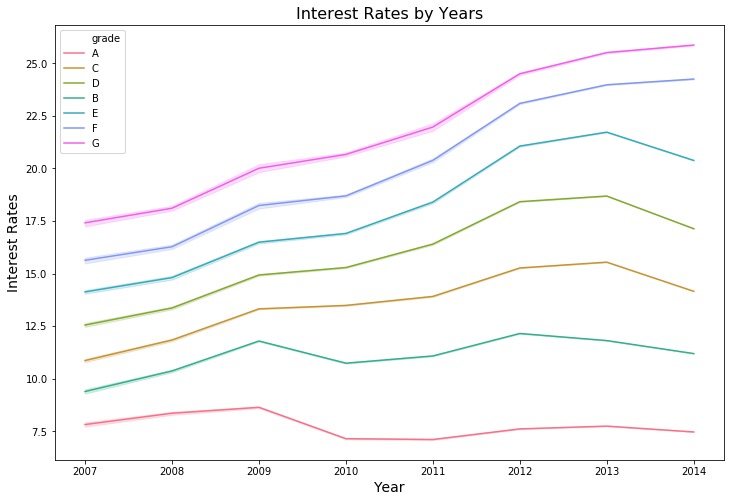

In [238]:
#acceptedgroupby'grade']
plt.figure(figsize=(12,8))
sns.lineplot(x='year', y="int_rate", hue="grade",
                  data=accepted) 
plt.title('Interest Rates by Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Interest Rates', fontsize=14)
             
plt.savefig('InterestrateYear.png')


In [239]:
# plt.figure(figsize =(14,10))
# sns.lineplot(x='loan_duration', y="int_rate", hue="grade",
#                   data=accepted)

In [240]:
#avg_i

In [241]:
avg_i = pd.DataFrame(accepted.groupby(['grade','year'])["int_rate"].mean()).reset_index()#.unstack(fill_value=0).plot.line()##.groupby('grade')
avg_i
#set_index('grade').
#accepted['avg_i']
#.plot(kind ='line')
#.plot.lineplot(x='year', y="int_rate", hue="grade",data=accepted)

,grade,year,int_rate
0,A,2007,7.817619
1,A,2008,8.356183
2,A,2009,8.637664
3,A,2010,7.145758
4,A,2011,7.107155
5,A,2012,7.611344
6,A,2013,7.744067
7,A,2014,7.466342
8,B,2007,9.387681
9,B,2008,10.366058


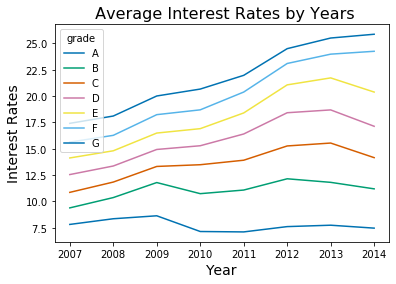

In [242]:
avg_i.pivot(index="year", columns="grade", values="int_rate").plot()

plt.title(' Average Interest Rates by Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Interest Rates', fontsize=14)
             
plt.savefig('InterestrateYear1.png')

In [243]:
fully_paid = accepted[accepted['loan_status']=="FullyPaid"]
fully_paid = pd.DataFrame(fully_paid)
fully_paid["returnex"] = ((fully_paid["installment"]*fully_paid["term"])-fully_paid["loan_amnt"])*100/fully_paid["loan_amnt"]

In [244]:
fully_paid = accepted[accepted['loan_status']=="FullyPaid"]
fully_paid = pd.DataFrame(fully_paid)
fully_paid["returna"] = ((fully_paid["installment"]*fully_paid['term'])-fully_paid["loan_amnt"])*100/fully_paid["loan_amnt"]

In [245]:
fully_paid.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title',
       ...
       'disbursement_method', 'debt_settlement_flag', 'duration_days',
       'invest_return', 'invest_return_per', 'duration_months', 'year',
       'int_rate_bins', 'loan_duration', 'returna'],
      dtype='object', length=102)

In [246]:
# fully_paid['invest_return_per']
fully_paid['actual_return'] = list(map(lambda x: round(x,2), 
                                          (fully_paid['total_pymnt'] - fully_paid['funded_amnt'])*100/fully_paid['funded_amnt']))
fully_paid['actual_return'] 

1         15.95
2          3.89
4         19.08
5         15.07
7          4.89
          ...  
453641     8.53
453642    27.69
453643    25.27
453644    26.49
453646    43.59
Name: actual_return, Length: 376150, dtype: float64

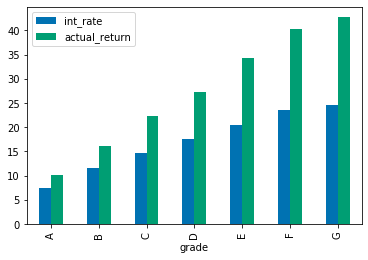

<Figure size 1152x432 with 0 Axes>

In [247]:
fully_paid.groupby(['grade','year'])[['int_rate','actual_return']].agg({'int_rate':'mean','actual_return':'mean'})
t =fully_paid.groupby(['grade']).agg({'int_rate':'mean','actual_return':'mean'}).plot(kind='bar')
plt.figure(figsize=(16,6))
t.figure.savefig('ratereturnt.png')
t


In [248]:
# fully_paid['total_rec_int']*100 /fully_paid['funded_amnt']

In [249]:
defaultt = accepted[accepted['loan_status']=="Defaulted"]
defaultt = pd.DataFrame(defaultt)
defaultt

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,hardship_flag,disbursement_method,debt_settlement_flag,duration_days,invest_return,invest_return_per,duration_months,year,int_rate_bins,loan_duration
0,36805548,10400.0,10400.0,10400.000000,36,6.99,321.08,A,A3,Truck Driver Delivery Personel,...,N,Cash,N,609,-3788.31,-0.364261,20,2014,"(5.399, 9.548]",20
3,37662224,7650.0,7650.0,7650.000000,36,13.66,260.20,C,C3,Technical Specialist,...,N,Cash,N,243,-5368.02,-0.701702,8,2014,"(9.548, 13.676]",8
6,36804663,23325.0,23325.0,23325.000000,36,14.31,800.71,C,C4,Teacher,...,N,Cash,N,427,-9417.21,-0.403739,14,2014,"(13.676, 17.804]",14
8,37800722,12975.0,12975.0,12975.000000,36,17.86,468.17,D,D5,Sales,...,N,Cash,N,456,-7228.11,-0.557080,15,2014,"(17.804, 21.932]",15
11,37701596,10000.0,10000.0,10000.000000,36,11.99,332.10,B,B5,Investment Consultant,...,N,Cash,N,670,-3042.55,-0.304255,22,2014,"(9.548, 13.676]",22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453607,1067799,15200.0,15200.0,14443.634553,60,17.27,379.97,D,D3,camp lejune fire dept,...,N,Cash,N,790,-3882.55,-0.255431,26,2012,"(13.676, 17.804]",26
453613,1064950,4900.0,4900.0,4900.000000,60,16.77,121.18,D,D2,G4S Secure solution,...,N,Cash,N,1308,1038.84,0.212008,43,2012,"(13.676, 17.804]",43
453636,1063649,17500.0,16800.0,16775.000000,60,22.74,471.10,G,G1,Microsoft,...,N,Cash,N,305,-12089.00,-0.719583,10,2012,"(21.932, 26.06]",10
453637,1062754,35000.0,22550.0,22550.000000,60,14.27,527.87,C,C2,Nucor Steel,...,N,Cash,N,1277,174.80,0.007752,42,2012,"(13.676, 17.804]",42


In [250]:
grade_lstatus = accepted.groupby(['grade', 'year', 'loan_status']).size().reset_index().rename(columns = {0:'count'})
grade_lstatus = grade_lstatus.merge(grade_lstatus.groupby('grade').agg({'count':'sum'}), on = 'grade')
grade_lstatus['prop'] = grade_lstatus['count_x']*100/grade_lstatus['count_y']
grade_lstatus.drop(columns = ['count_x', 'count_y'], inplace = True)

In [251]:
grade_lstatus

,grade,year,loan_status,prop
0,A,2007,Defaulted,0.004023
1,A,2007,FullyPaid,0.052298
2,A,2008,Defaulted,0.025478
3,A,2008,FullyPaid,0.399608
4,A,2009,Defaulted,0.108618
5,A,2009,FullyPaid,1.504566
6,A,2010,Defaulted,0.179690
7,A,2010,FullyPaid,3.613909
8,A,2011,Defaulted,0.498840
9,A,2011,FullyPaid,7.217089


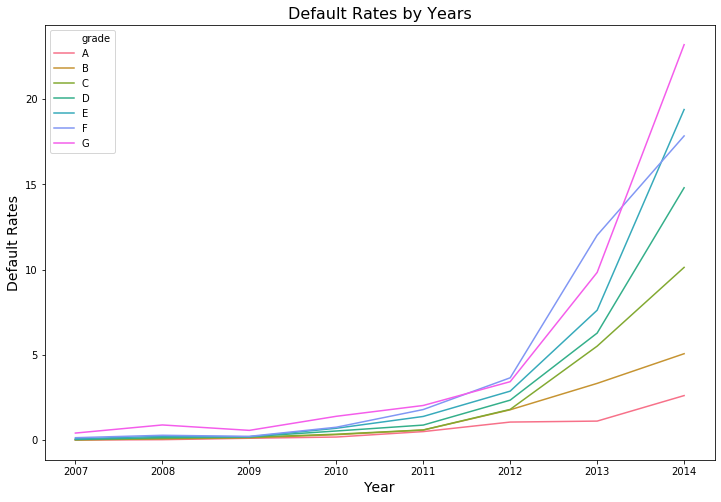

In [252]:
# grade_lstatus[[grade_lstatus]]
defaultedd = grade_lstatus.loc[grade_lstatus['loan_status'] == 'Defaulted', :]

defaultedd
plt.figure(figsize=(12,8))
sns.lineplot(x='year', y="prop", hue="grade",
                  data=defaultedd)
plt.title('Default Rates by Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Default Rates', fontsize=14)
plt.savefig('DefaultrateYear.png')

In [253]:
termgrade = accepted.groupby(['grade', 'term']).agg({'loan_amnt':'mean'}).reset_index()

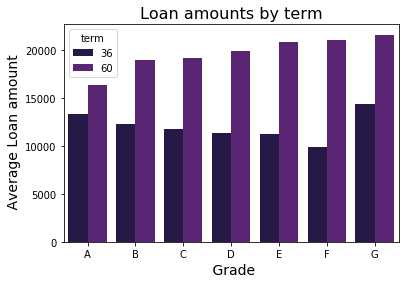

In [254]:
palette = sns.color_palette("magma")
sns.barplot(x = 'grade', y = 'loan_amnt', hue = 'term', data = termgrade,palette =palette)
plt.title('Loan amounts by term', fontsize=16)
plt.xlabel(' Grade', fontsize=14)
plt.ylabel( ' Average Loan amount', fontsize=14)
plt.savefig('Loanamntmean.png')